**LINEAR REGRESSION EXERCISE**
A Codecademy lesson

In [75]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# load and investigate the data here:

df = pd.read_csv("tennis_stats.csv")
print("*HOW DOES IT LOOK?*")
print(df.info)
print("***")
print(df.shape)
print("*WHAT TYPES?*")
print(df.dtypes)
print("*ANY NULL ROWS?*")
print(df.isnull().sum())

*HOW DOES IT LOOK?*
<bound method DataFrame.info of                      Player  Year  FirstServe  FirstServePointsWon  \
0               Pedro Sousa  2016        0.88                 0.50   
1           Roman Safiullin  2017        0.84                 0.62   
2               Pedro Sousa  2017        0.83                 0.60   
3       Rogerio Dutra Silva  2010        0.83                 0.64   
4      Daniel Gimeno-Traver  2017        0.81                 0.54   
...                     ...   ...         ...                  ...   
1716             Yann Marti  2010        0.41                 0.66   
1717          Mikhail Elgin  2012        0.41                 0.60   
1718  Alexander Kudryavtsev  2012        0.40                 0.64   
1719           Ivan Nedelko  2011        0.37                 0.30   
1720       Alexander Zverev  2013        0.36                 0.50   

      FirstServeReturnPointsWon  SecondServePointsWon  \
0                          0.38                  0

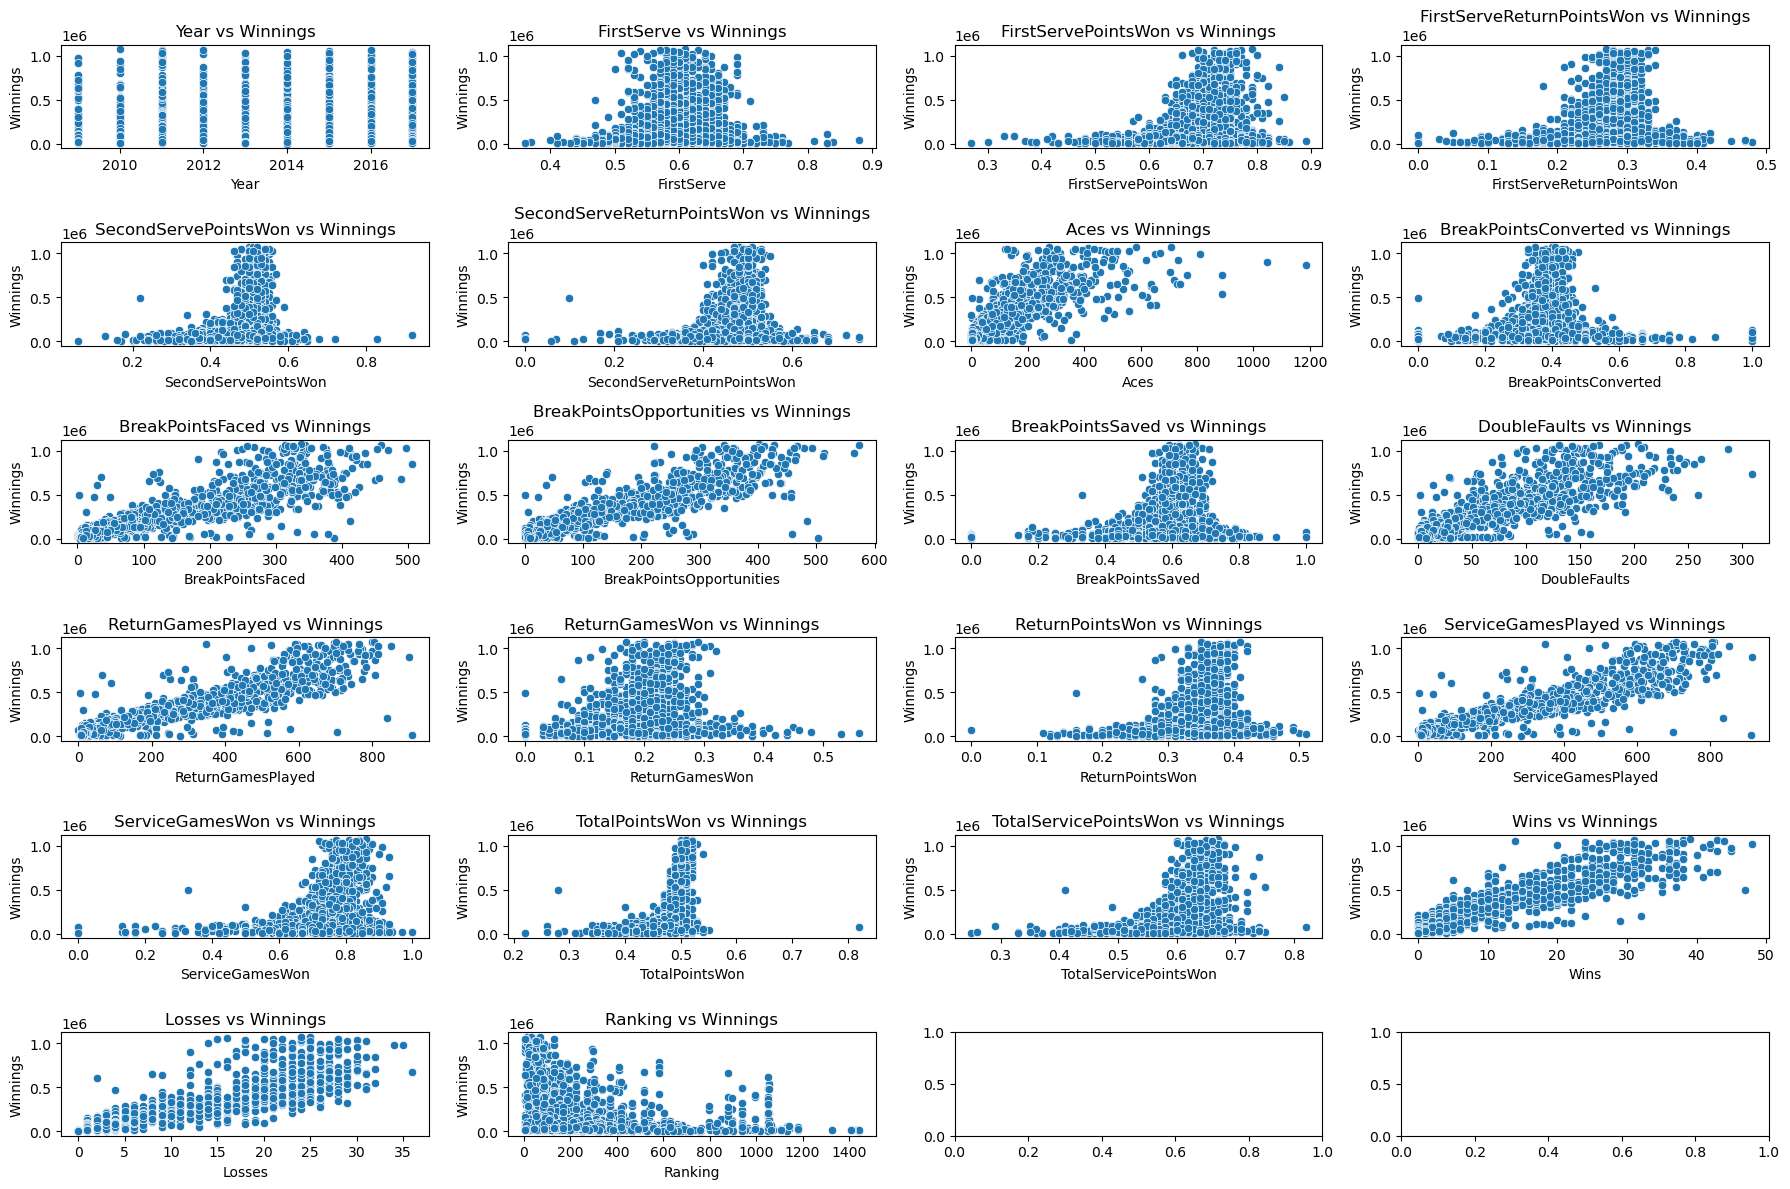

Index(['Player', 'Year', 'FirstServe', 'FirstServePointsWon',
       'FirstServeReturnPointsWon', 'SecondServePointsWon',
       'SecondServeReturnPointsWon', 'Aces', 'BreakPointsConverted',
       'BreakPointsFaced', 'BreakPointsOpportunities', 'BreakPointsSaved',
       'DoubleFaults', 'ReturnGamesPlayed', 'ReturnGamesWon',
       'ReturnPointsWon', 'ServiceGamesPlayed', 'ServiceGamesWon',
       'TotalPointsWon', 'TotalServicePointsWon', 'Wins', 'Losses', 'Winnings',
       'Ranking'],
      dtype='object')


In [77]:
# perform exploratory analysis here:
df_wo_player = df.drop(columns=['Player'])
df_wo_winnings = df.drop(columns=['Winnings'])
features = df.drop(columns=["Player", "Winnings"])

fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(18, 12))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.scatterplot(data=df, x=feature, y="Winnings", ax=axes[i])
    axes[i].set_title(f"{feature} vs Winnings")

plt.tight_layout()
plt.show()

print(df.columns)

ONLY LINEAR STUFF


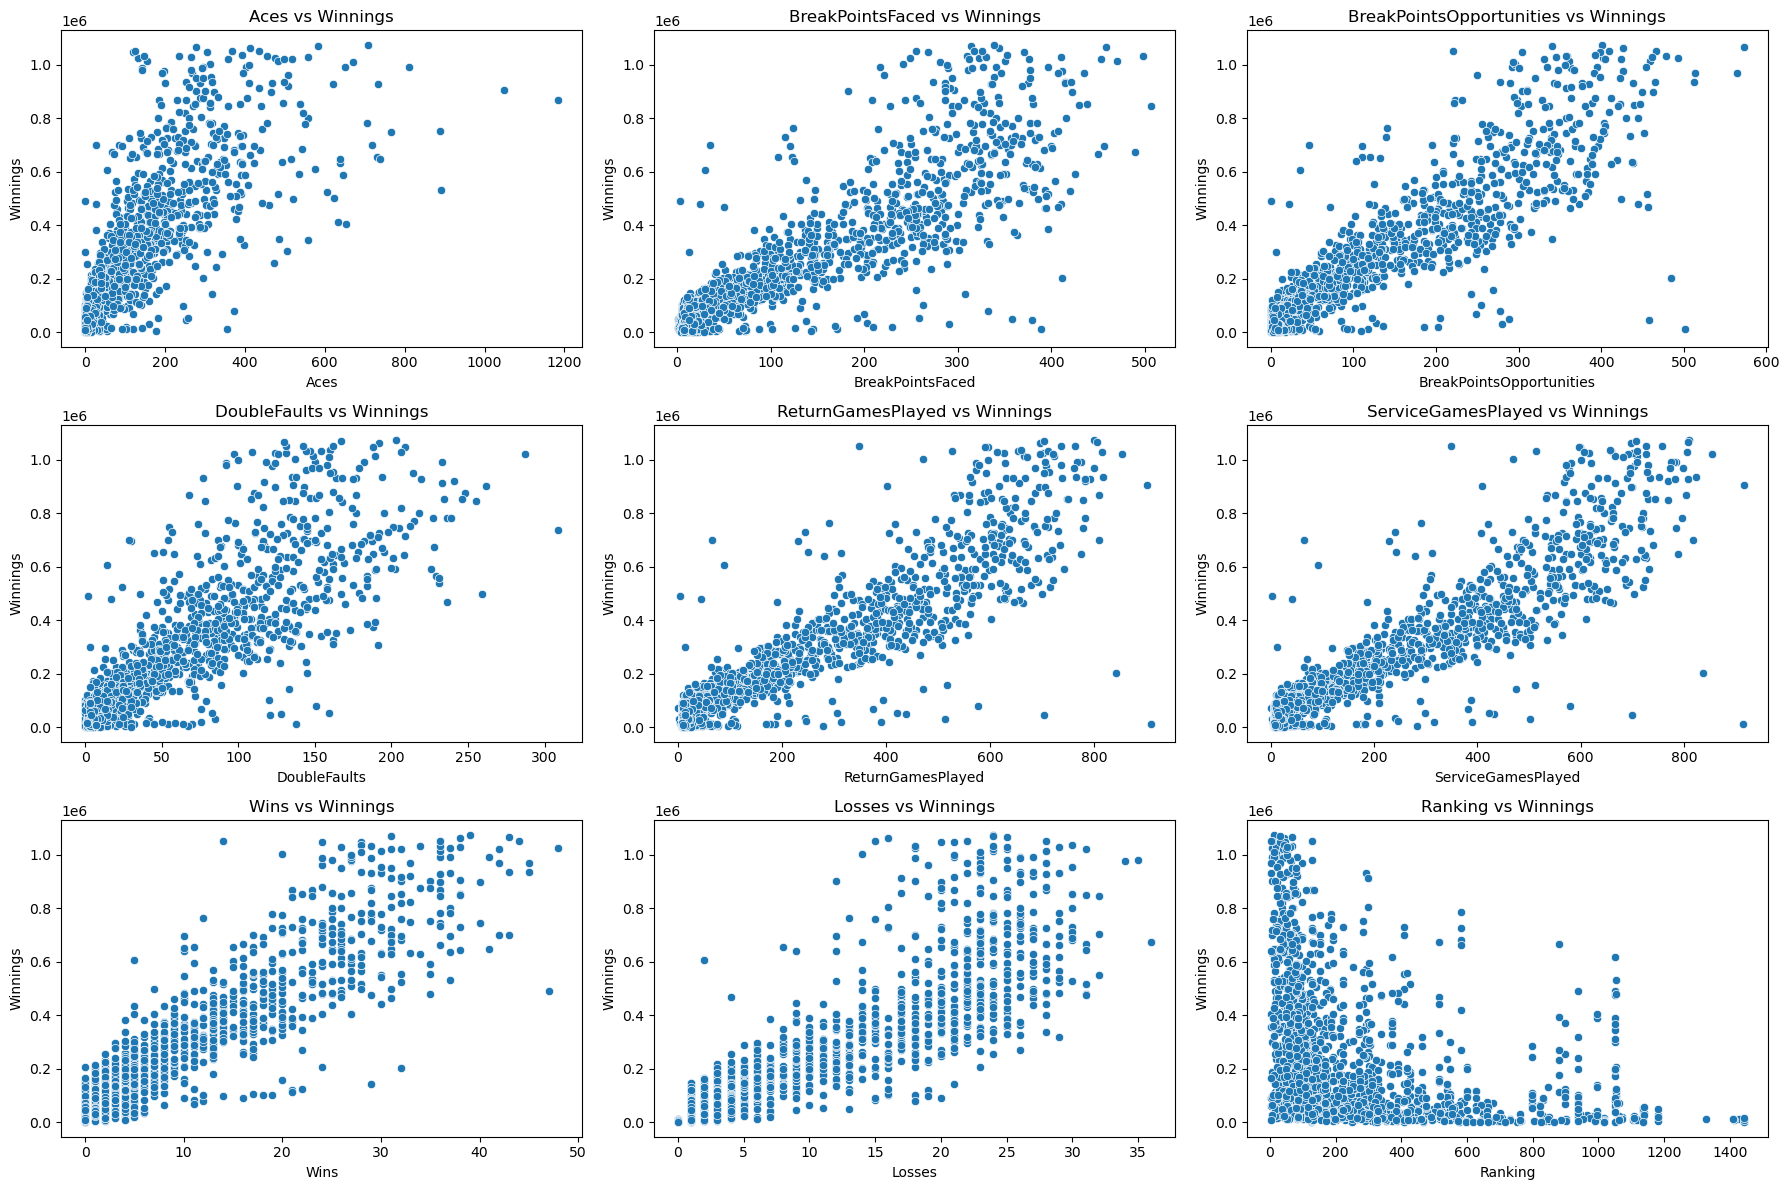

In [79]:
print("ONLY LINEAR STUFF")
linear_features = ['Aces', 'BreakPointsFaced', 'BreakPointsOpportunities',
       'DoubleFaults', 'ReturnGamesPlayed', 'ServiceGamesPlayed', 'Wins',
        'Losses', 'Ranking']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()  # Flatten the axes array for easy iteration

for i, feature in enumerate(linear_features):
    sns.scatterplot(data=df, x=feature, y="Winnings", ax=axes[i])
    axes[i].set_title(f"{feature} vs Winnings")

plt.tight_layout()  # Adjusts spacing between plots to avoid overlap
plt.show()

I'll choose "ReturnGamesPlayed" for single linear regression

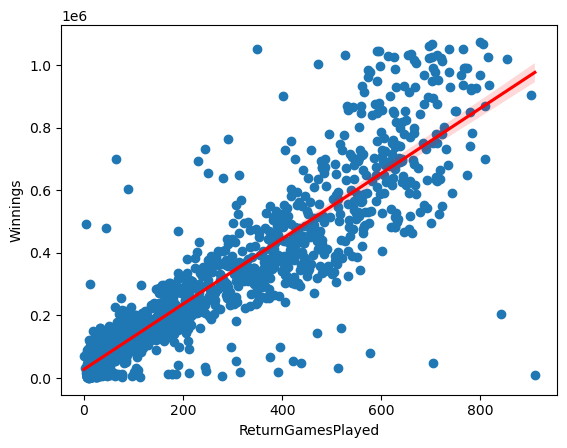

In [81]:
feature = ["ReturnGamesPlayed"]

plt.scatter(df.ReturnGamesPlayed, df.Winnings)
sns.regplot(x='ReturnGamesPlayed', y='Winnings', data=df, scatter=False, color='red') 
plt.show()

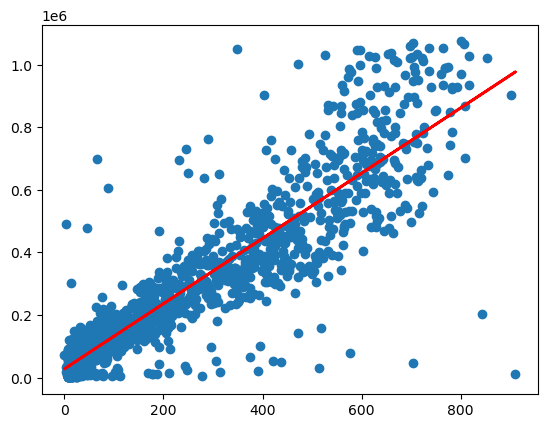

In [83]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
X = df['ReturnGamesPlayed'].values.reshape(-1, 1)
y = df['Winnings']

regr.fit(X,y)
y_predicted = regr.predict(X)

plt.scatter(df.ReturnGamesPlayed, df.Winnings)
plt.plot(X, y_predicted, color='red', linewidth=2, label='Regression Line') 
plt.show()

I'll take another one and split the dataset, then run the line with actual predictions

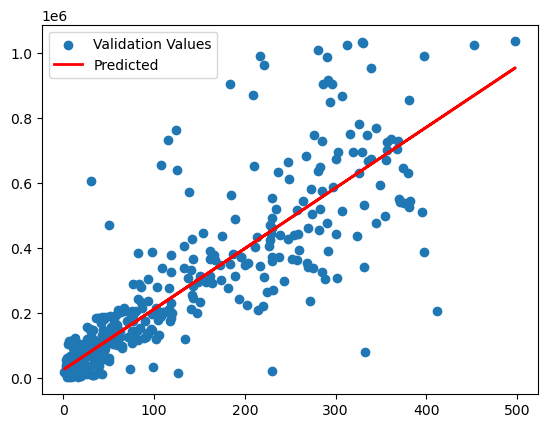

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

feature = "BreakPointsFaced"
feature_reshaped = df.BreakPointsFaced.values.reshape(-1, 1)
target = df["Winnings"]

train_X, val_X, train_y, val_y = train_test_split(feature_reshaped, target, random_state = 1)
regr.fit(train_X, train_y)
y_predicted = regr.predict(val_X)

plt.scatter(val_X, val_y, label='Validation Values')
plt.plot(val_X, y_predicted, color='red', linewidth=2, label='Predicted')
plt.legend()
plt.show()


Now for double feature

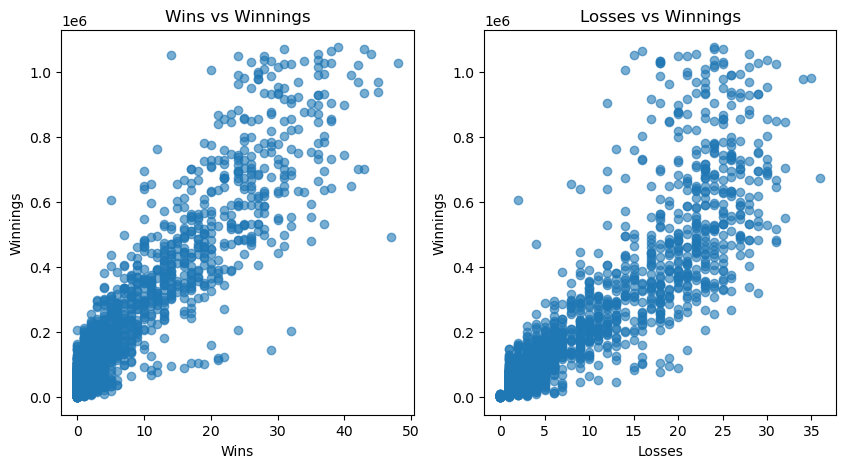

In [126]:
## perform two feature linear regressions here:
X = df[['Wins', 'Losses']]
y = df[["Winnings"]]

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

for i in range(2):
    axs[i].scatter(X.iloc[:, i], y, alpha=0.6)
    axs[i].set_title(f'{X.columns[i]} vs Winnings')
    axs[i].set_xlabel(X.columns[i])
    axs[i].set_ylabel('Winnings')

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)
regr.fit(train_X, train_y)
y_predicted = regr.predict(val_X)

C:\Users\mikub\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


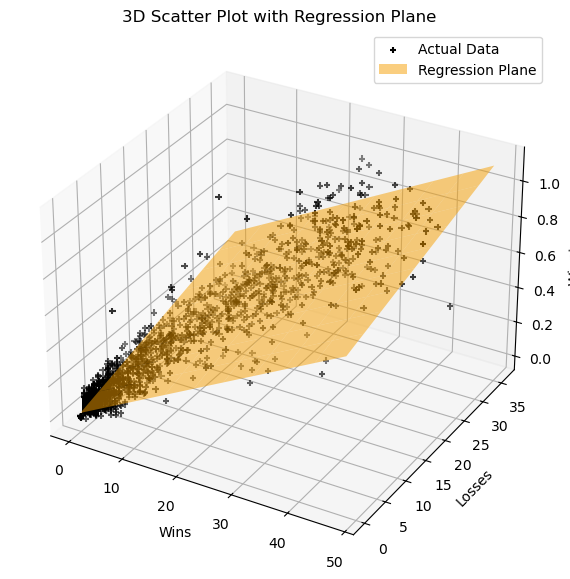

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

# Sample DataFrame (replace this with your actual DataFrame)

# Define X and y
X = df[['Wins', 'Losses']]
y = df['Winnings']  # Change to a Series for easier access

# Split the data into training and validation sets
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)

# Fit the linear regression model
regr = LinearRegression()
regr.fit(train_X, train_y)

# Make predictions on the validation set
y_predicted = regr.predict(val_X)

# 3D Plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot of the actual data
ax.scatter(X['Wins'], X['Losses'], y, c='k', marker='+', label='Actual Data')

# Create a meshgrid for the regression surface
x_range = np.linspace(X['Wins'].min(), X['Wins'].max(), 10)
y_range = np.linspace(X['Losses'].min(), X['Losses'].max(), 10)
x_mesh, y_mesh = np.meshgrid(x_range, y_range)

# Predict the corresponding Winnings for the meshgrid
z_mesh = regr.predict(np.column_stack((x_mesh.ravel(), y_mesh.ravel()))).reshape(x_mesh.shape)

# Plotting the regression surface
ax.plot_surface(x_mesh, y_mesh, z_mesh, color='orange', alpha=0.5, label='Regression Plane')

# Set labels and title
ax.set_xlabel('Wins')
ax.set_ylabel('Losses')
ax.set_zlabel('Winnings')
ax.set_title('3D Scatter Plot with Regression Plane')
ax.legend()

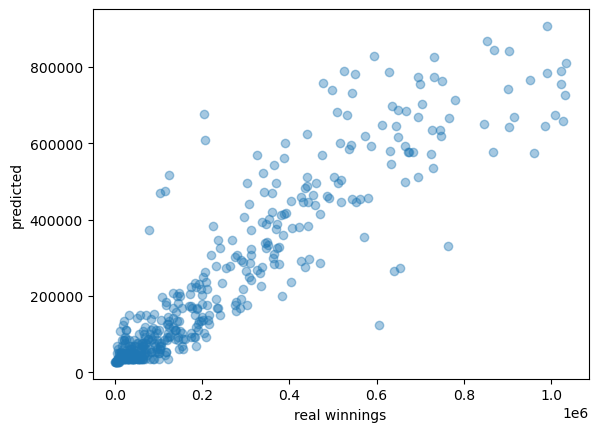

Features' coeficients (wins/losses)
[[16054.37660447  8550.46034138]]

Score R2
0.862486691646276
0.8267606221393974


In [128]:
plt.scatter(val_y, y_predicted, alpha=0.4)
plt.xlabel("real winnings")
plt.ylabel("predicted")
plt.show()

print("Features' coeficients (wins/losses)")
print(regr.coef_)
print("\nScore R2")
print(regr.score(train_X, train_y))
print(regr.score(val_X, val_y))

That was two features, now for all 9

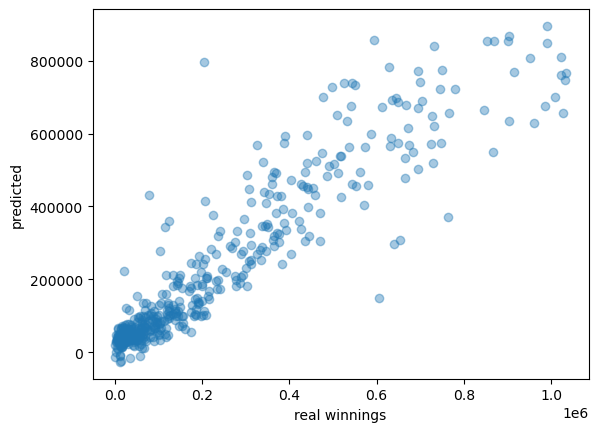

Features' coeficients (wins/losses)
[[ -153.10304284  -571.55864517    91.86210305   651.2182832
    601.90505644   -45.51908117 11549.89758923  3820.42671874
    -60.38592225]]

Score R2
0.880786967106919
0.8515844225818496


In [132]:
linear_features = ['Aces', 'BreakPointsFaced', 'BreakPointsOpportunities',
       'DoubleFaults', 'ReturnGamesPlayed', 'ServiceGamesPlayed', 'Wins',
        'Losses', 'Ranking']

X = df[linear_features]
y = df[["Winnings"]]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)
regr.fit(train_X, train_y)
y_predicted = regr.predict(val_X)

plt.scatter(val_y, y_predicted, alpha=0.4)
plt.xlabel("real winnings")
plt.ylabel("predicted")
plt.show()

print("Features' coeficients (wins/losses)")
print(regr.coef_)
print("\nScore R2")
print(regr.score(train_X, train_y))
print(regr.score(val_X, val_y))


Results are pretty good; let's see if we can fine-tune by deleting weak features

In [151]:
linear_features = ['Aces', 'BreakPointsFaced', 'BreakPointsOpportunities',
       'DoubleFaults', 'ReturnGamesPlayed', 'Wins',
        'Losses', 'Ranking']

X = df[linear_features]
y = df[["Winnings"]]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 1)
regr.fit(train_X, train_y)
y_predicted = regr.predict(val_X)

print("Features' coeficients (wins/losses)")
print(regr.coef_)
print("\nScore R2")
print(regr.score(train_X, train_y))
print(regr.score(val_X, val_y))

Features' coeficients (wins/losses)
[[ -153.73275823  -571.99996297    92.45083246   651.13677022
    556.54711588 11541.78982368  3833.49836695   -60.37202355]]

Score R2
0.8807865417568337
0.8516348554356026


And it's neglectable. ['Aces', 'BreakPointsFaced', 'BreakPointsOpportunities', 'DoubleFaults', 'ReturnGamesPlayed', 'Wins', 'Losses', 'Ranking'] is the best feature set we have